# 2023/2024 - Ma412 

# Lab 6: Principal Components Analysis 

The objective of this notebook is to use principal component analysis (PCA) to perform dimensionality reduction.

## <font color='black'>Set-Up</font>
First we will import the packages that we will need throughout the notebook.

In [146]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.io import loadmat
#from draw_line import draw_line
import utils

Firstly, we will implement the algorithm for the following 2D dataset.

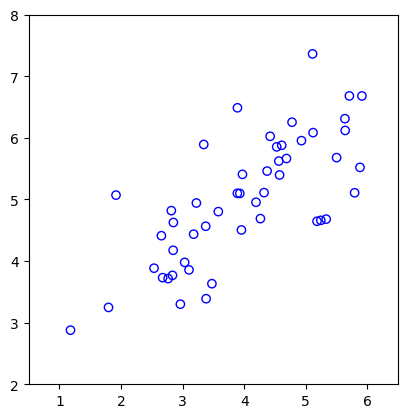

In [147]:
data=loadmat(os.path.join('data', 'ex7data1.mat'))
X = data['X']
plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.xlim(0.5, 6.5)
plt.ylim(2, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We see that the dataset looks like it could be approximated by a few features if we disregard the outliers

## Principal Component Analysis

Assume that we are performing PCA on
some dataset $\boldsymbol X$ for $M$ principal components. 
We then need to perform the following steps, which we break into parts:

1. Data normalization (`normalize`).
2. Find eigenvalues and corresponding eigenvectors for the covariance matrix $S$.
   Sort by the largest eigenvalues and the corresponding eigenvectors (`eig`).

After these steps, we can then compute the projection and reconstruction of the data onto the spaced spanned by the top $n$ eigenvectors.

In the folowwing cell, compltete the `feature_normalize()` function that normalizes the features in the given dataset.

In [148]:
#EDIT THIS CELL
def feature_normalize(X):
    """
    Normalizes the features in X.
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        Normalized training vectors.
    mu : ndarray, shape (n_feature, )
        Mean value of each feature.
    sigma : ndarray, shape (n_feature, )
        Standard deviation of each feature.
    """
    sigma = np.std(X,axis=0)
    mu = np.mean(X,axis=0)
    X_norm = (X - mu)/ sigma
    
    
    return X_norm, mu, sigma

Compute now the eigenvalues and corresponding eigenvectors for the covariance matrix.

In [149]:
#EDIT THIS CELL
def pca(X):
    """
    Run principal component analysis on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    S : ndarray, shape (n_features,)
        The singular values for every matrix.
    V : ndarray, shape (n_features, n_features)
        Unitary matrices.
    """
    n_f,n_s = X.shape
    sigma = X.T @ X / n_f
    U,S,V = np.linalg.svd(sigma)
    return U, S, V

Run now PCA and test it on the loaded dataset:

In [150]:
X_norm, mu, sigma = feature_normalize(X)
U,S,V = pca(X_norm)

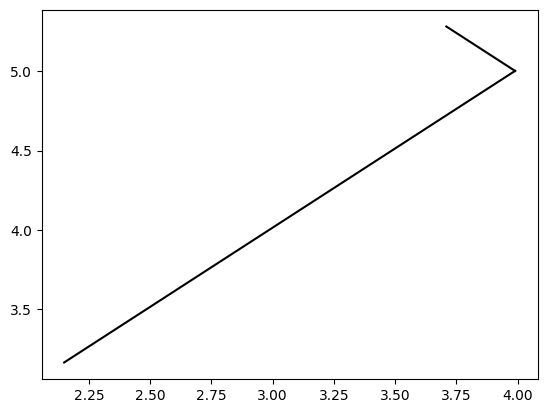

In [151]:
plt.figure()
utils.draw_line(mu, mu + 1.5 * S[0] * U[:,0].T)
utils.draw_line(mu, mu + 1.5 * S[1] * U[:,1].T)
plt.show()

In [152]:
print('Top eigenvector:')
print ('U = ', U[:, 0])
print ('(you should expect to see -0.70710678 -0.70710678)')

Top eigenvector:
U =  [-0.70710678 -0.70710678]
(you should expect to see -0.70710678 -0.70710678)


Comment the obtained results. 

In [153]:
#Here we plotted the divergence of the features in regard to the mean; We can see that the first feature diverges a lot more than the second feature.
# This shows that the first feature have the highest variant of them, thus beign the most significative.
# We also obtained the expected results.

## Dimension Reduction

In the following cell, compute the projection matrix Z:

In [154]:
def project_data(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    K : int
        Reduced dimension.

    Returns
    -------
    Z : ndarray, shape (n_samples, K)
        The projection of X into the reduced dimensional space spanned by the first K columns of U.
    """
    Z = X @ U[:,0:K]
    return Z

The `recover_data()` recovers an approximation of the original data from the projected data.

In [155]:
def recover_data(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data.
    
    Parameters
    ----------
    Z : ndarray, shape (n_samples, K)
        The projected data, where n_samples is the number of samples and K is the number of reduced dimensions.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices, where n_features is the number of features.
    K : int
        Reduced dimension.

    Returns
    -------
    X_rec : ndarray, shape (n_samples, n_features)
        The recovered samples.
    """
    X_rec = Z.dot(U[:, 0:K].T)
    return X_rec

We can plot the projection by computing the projected and recovered data:

Projection of the first example:  [1.49631261]
(this value should be about 1.48127391)
Approximation of the first example: [-1.05805279 -1.05805279]
(this value should be about  -1.04741883 -1.04741883)


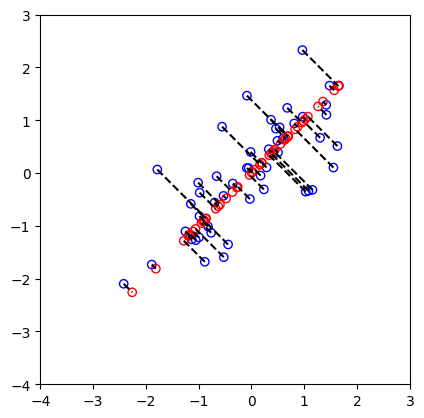

In [156]:
# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b')
plt.xlim(-4, 3)
plt.ylim(-4, 3)
plt.gca().set_aspect('equal', adjustable='box')

# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print( 'Projection of the first example: ', Z[0, ])
print ('(this value should be about 1.48127391)')

X_rec = recover_data(Z, U, K)
print ('Approximation of the first example:', X_rec[0, ])
print ('(this value should be about  -1.04741883 -1.04741883)')

# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    utils.draw_line(X_norm[i,:], X_rec[i,:], dash=True)
axes = plt.gca()
axes.set_xlim([-4, 3])
axes.set_ylim([-4, 3])
axes.set_aspect('equal', adjustable='box')
plt.show()

What do you conclude?

In [157]:

# the recast shows a strong linear correlation between the first and second features, whereas the original was less clear : this shows the lack of small variations in the reconstructed
# data due to the number of features beign smaller.

## Example

In this part of the notebook, you will use a PCA on the dataset `ex7faces.mat` that contains a collection of 32 × 32 grayscale face images. Firstly, load and analyze your dataset. 

<Figure size 640x480 with 0 Axes>

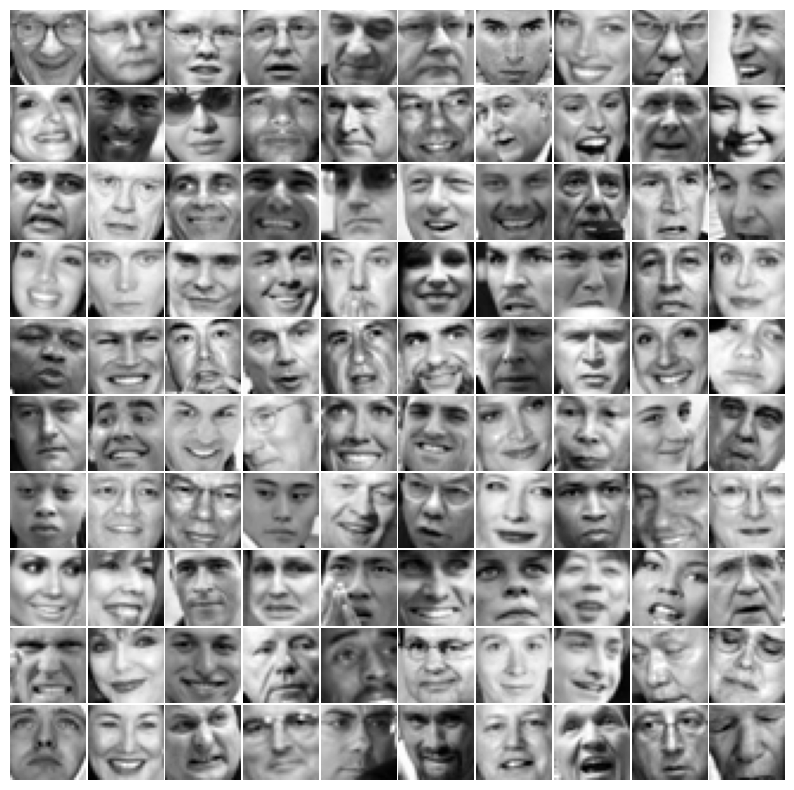

In [158]:
# Load Face dataset
mat_data = loadmat(os.path.join('data', 'ex7faces.mat'))
X = mat_data['X']
plt.figure()
fig=utils.displayData(X[0:100, :])
plt.show()

Run now PCA on the loaded face data:

In [159]:
X_norm, mu, sigma = feature_normalize(X)
U,S,V = pca(X_norm)

Reduce the dimension of the sample from 1024 (32 by 32) to 100:

In [160]:

# Project the data onto K = 1 dimension
K = 100
Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)

Plot now the original images and the ones reconstructed from only the top 100 principal components:

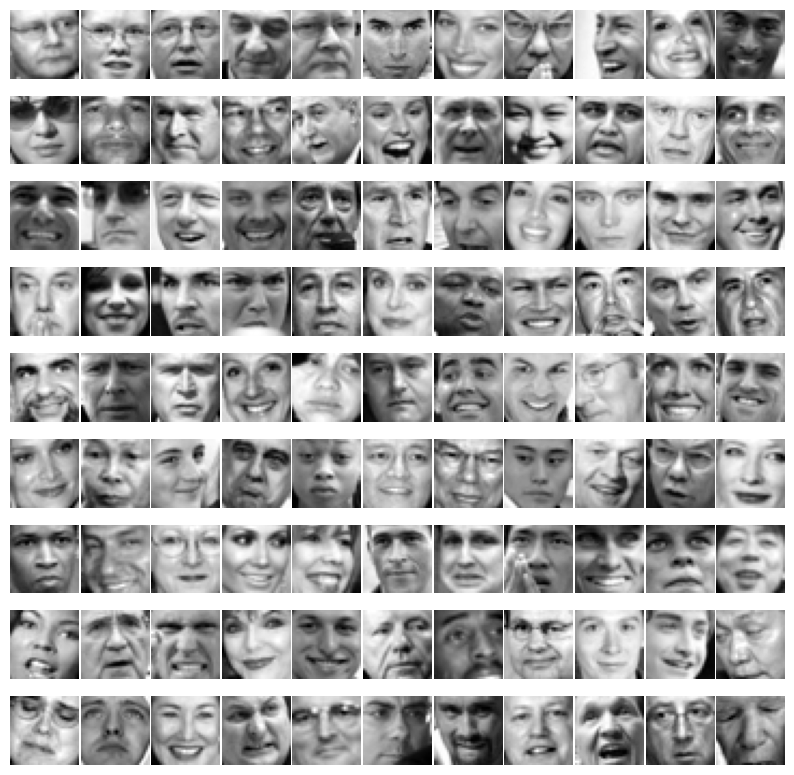

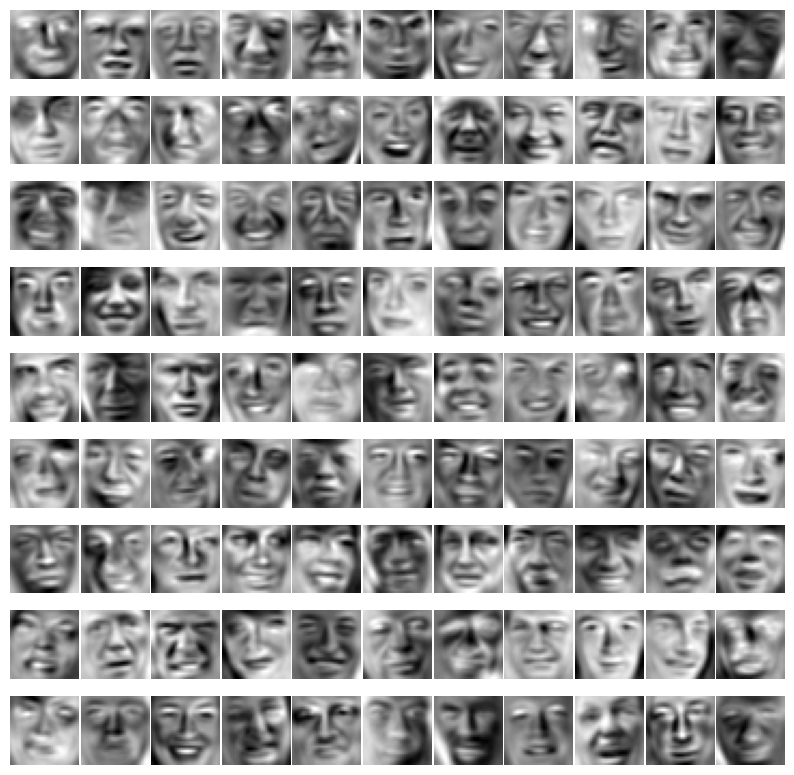

In [161]:

utils.displayData(X[1:100, :])
plt.show()

utils.displayData(X_rec[1:100,:])
plt.show()

Conclude.

In [162]:
#we manage to get a 90% reduction by removing the less important features of the dataset : 
    #the resulted images look a bit blurry, but still contain the recognisable features of the face.
#The PCA method on a dataset seems very useful to use on similar big datasets : it saves storage space, and decreases the number of features-thus diminishing the processing power
#needed for most of the compuation